In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize']= (15,5)

In [3]:
path = "data/"
filename = "dinheirorestante.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=';')

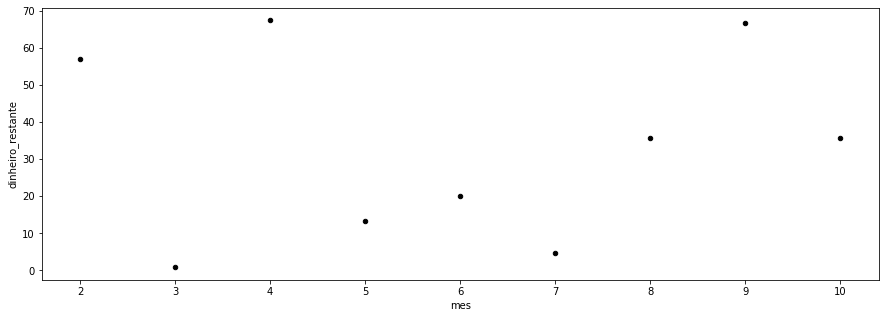

In [4]:
df.plot(kind='scatter', x='mes', y='dinheiro_restante', color='black')

In [5]:
df['dinheiro_restante'].describe()

count     9.000000
mean     33.448889
std      25.752132
min       0.750000
25%      13.200000
50%      35.590000
75%      56.880000
max      67.420000
Name: dinheiro_restante, dtype: float64

In [6]:
# Dropando ultima linha do df

In [7]:
restantemes10 = df['dinheiro_restante'].values[-1]
df = df.drop(df.index[-1])

target_df = [[restantemes10]]

In [8]:
df.tail()

,mes,dinheiro_restante
3,5,13.20
4,6,20.06
5,7,4.70
6,8,35.71
7,9,66.73


In [9]:
# Polynomial Test

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np

In [11]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [14]:
X = pd.DataFrame(df['mes'])
y = pd.DataFrame(df['dinheiro_restante'])

In [15]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [16]:
pred_df = (model.predict([[10]]))

In [17]:
pred_df

array([[121.94857143]])

In [20]:
y_test = pred_df
y_pred = target_df
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  86.35857142857301
MSE 7457.8028591839475
RMSE 86.35857142857301


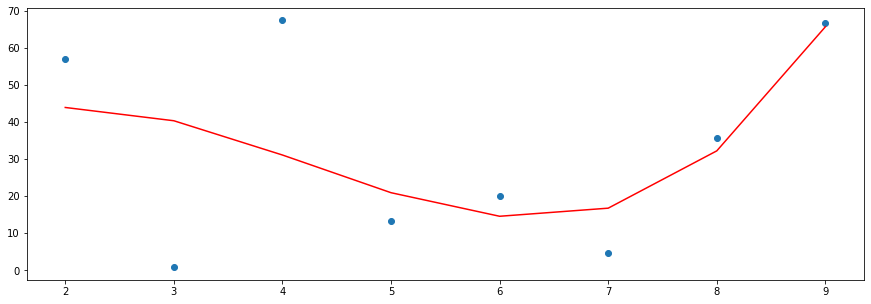

In [21]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [22]:
# A partir do mês 5 pontos próximos da reta porém, taxas de erro altíssimas.

In [23]:
# Com relação a qual modelo é melhor: 
# A amostra é muito pequena para definir qual modelo é melhor, pois o comportamento é limitado a apenas 9 amostras.